<a href="https://colab.research.google.com/github/ritu-kumar/Machine-learning-projects/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [6]:
car_dataset = pd.read_csv('/content/car data.csv')

In [7]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
car_dataset.shape

(301, 9)

In [9]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
# Checking numbers for various categories
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())
print(car_dataset.Owner.value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
0    290
1     10
3      1
Name: Owner, dtype: int64


In [12]:
# Encoding the categorical data
# Fuel type
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
# Seller type
car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)
# Transmission_Type
car_dataset.replace({'Transmission':{'Manual':1, 'Automatic':0}}, inplace=True)


In [13]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,0,1,0
3,wagon r,2011,2.85,4.15,5200,0,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [14]:
x= car_dataset.drop(['Car_Name', 'Selling_Price'], axis = 1)
y = car_dataset['Selling_Price']
print(x,y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             1   
1    2013           9.54       43000          1            0             1   
2    2017           9.85        6900          0            0             1   
3    2011           4.15        5200          0            0             1   
4    2014           6.87       42450          1            0             1   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             1   
297  2015           5.90       60000          0            0             1   
298  2009          11.00       87934          0            0             1   
299  2017          12.50        9000          1            0             1   
300  2016           5.90        5464          0            0             1   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1,random_state = 2)
print(y_train.shape)

(270,)


In [16]:
# Training the model
lin_reg_model = LinearRegression()

In [17]:
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [18]:
training_data_prediction = lin_reg_model.predict(x_train)

In [19]:
# Using r squared methoed to calculate the accuracy of prediction
error_score = metrics.r2_score( y_train,training_data_prediction)

In [20]:
print(error_score)

0.8799451660493711


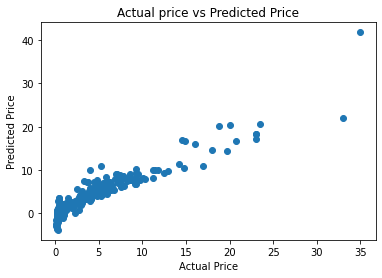

In [21]:
# Here, 0.88 doesn't tell whether it's good to have this score or not.
# We use accuracy score for classification and r2 error for regression.


# Visualise the actual prices and predicted prices
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual price vs Predicted Price')
plt.show()


In [22]:
# Testing the model
test_prediction = lin_reg_model.predict(x_test)
error_score = metrics.r2_score( y_test,test_prediction)
print(error_score)


0.8365766715027051


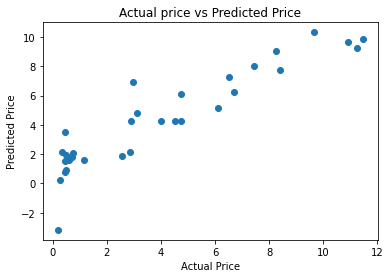

In [23]:
plt.scatter(y_test, test_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual price vs Predicted Price')
plt.show()


In [23]:
# An acceptable prediction 
# Now we need to use lasso regression model.

In [24]:
# Training the model
las = Lasso()

In [25]:
las.fit(x_train, y_train)

Lasso()

In [26]:
train_data_prediction = las.predict(x_train)

In [27]:
# Using r squared methoed to calculate the accuracy of prediction
error_score = metrics.r2_score( y_train,train_data_prediction)

In [28]:
print(error_score)

0.8427856123435794


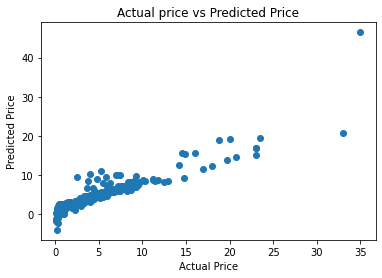

In [29]:

# Visualise the actual prices and predicted prices
plt.scatter(y_train, train_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual price vs Predicted Price')
plt.show()


In [30]:
# Testing the model
test_prediction = las.predict(x_test)
error_score = metrics.r2_score( y_test,test_prediction)
print(error_score)


0.8709167941173195


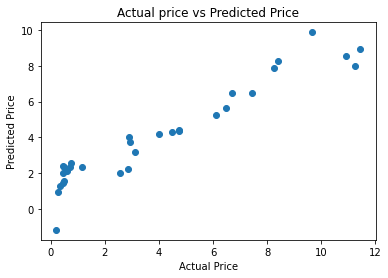

In [31]:
plt.scatter(y_test, test_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual price vs Predicted Price')
plt.show()
